In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

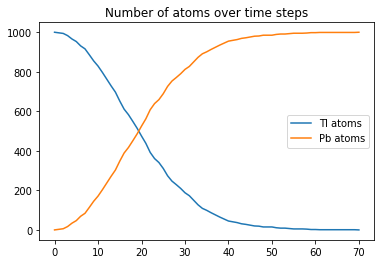

In [2]:
tl_atoms = 1000
pb_atoms = 0
tl_atoms_list = []
pb_atom_list = []

tl_atoms_list.append(tl_atoms)
pb_atom_list.append(pb_atoms)

def p_decay(t):
    return 1-2**(-t/(3.052*60)) # probability of decay in the 3 minutes
    
steps = 0
while(tl_atoms>0):
    steps += 1
    p = p_decay(steps)
    n_decaded_step = 0
    for n in range(tl_atoms): # for each remaining atom, p of decaying 
        status = np.random.random() # random state of the atom
        if status < p:
            n_decaded_step += 1
    pb_atoms += n_decaded_step
    tl_atoms -= n_decaded_step
    tl_atoms_list.append(tl_atoms)
    pb_atom_list.append(pb_atoms)
    
plt.figure()
plt.title("Number of atoms over time steps")
plt.plot(range(steps+1), tl_atoms_list, label = "Tl atoms")
plt.plot(range(steps+1), pb_atom_list, label = "Pb atoms")
plt.legend()

Text(0.5, 1.0, 'Number of atoms not decayed as function of time')

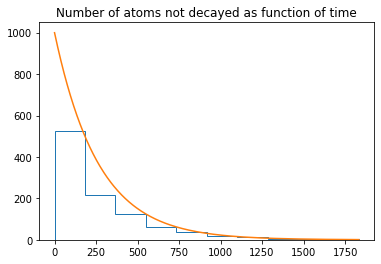

In [11]:
def cdf(t):
    return  1-2**(-t/3.052*60)

def icdf(n):
    return  -(3.052*60)*np.log2(1-n) 

n = 1000
p_decay_atoms = np.random.random(n) 
plt.hist(icdf(p_decay_atoms),histtype='step', bins=10);     
plt.plot(np.sort(icdf(p_decay_atoms)), (1-(np.sort(p_decay_atoms)))*n)

plt.title("Number of atoms not decayed as function of time")

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

/home/tommaso/anaconda3/envs/HLP/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The fraction of particle that bounced back are:  0.1555


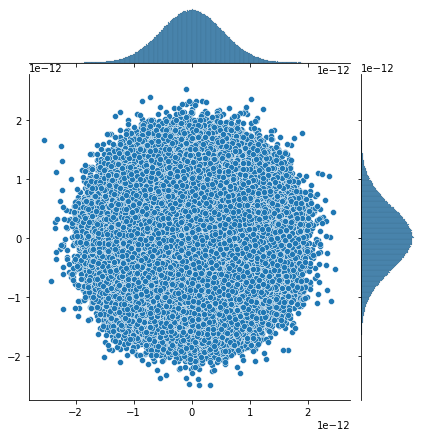

In [4]:
E = 7.7 * 1.60218e-13 # to Joule
a0 = 5.29e-11 #bohr radius
std = a0 / 100 #std of beam

#number of particles
alpha_particles = 1e6 
e0 = 8.85e-12 
Z = 79 
e = -1.6e-19

#generate 2d multivariate gaussian with box-muller method
n = int(alpha_particles)
z = np.random.random(n)
theta = 2*np.pi*np.random.random(n)
r_squared = -2*np.log(z)
r = np.sqrt(r_squared)
x = r*np.cos(theta)*std
y = r*np.sin(theta)*std

sns.jointplot(x,y, kind='scatter');

coordinates = np.array(list(zip(x,y))) 

#distance from the center 
b = np.array(np.linalg.norm(coordinates, axis =1)) 

# angles
theta = 2*np.arctan((Z*e**2 )/(2*np.pi*e0*E*b))

bounce_back_fraction = np.sum(theta>np.pi/2)/alpha_particles
print("The fraction of particle that bounced back are: ", bounce_back_fraction*100)

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [8]:
def f(x):
    return (np.sin(1/(2*x-x**2)))**2

n = 1000

# compute integral with provided method
x = np.linspace(0,2,n)[1:-1]
I = np.trapz(f(x),x)

#hit/miss method
N = 100000
count = 0

for i in range(N):
    x = 2*np.random.random()
    y = np.random.random()
    if y < f(x): 
        count+=1
        
I_hm = 2*count/N

#mean value method
x_mean = 2*np.random.random(N)
mean = 1 / N*np.sum(f(x_mean))
I_mean = 2*mean

print("Integral result: ", I)
print("Hit/miss method integral result: ", I_hm)
print("Mean value integral result: ", I_mean)
print("\nError calculation between the integral provided method result and the hit/miss - mean value methods")
print("Error of hit/miss integral: ", (np.abs(I_hm-I)) )
print("Error of mean value integral: ", (np.abs(I_mean-I)))

Integral result:  1.4451696792619255
Hit/miss method integral result:  1.45082
Mean value integral result:  1.4508670635874739

Error calculation between the integral provided method result and the hit/miss - mean value methods
Error of hit/miss integral:  0.005650320738074477
Error of mean value integral:  0.005697384325548338


The error of the two methods are close to each other

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [9]:
def integral_dimension(dimension):
    n = 100000
    x = np.random.uniform(low=-1.,high=1., size=(dimension, n))
    volume = 2**dimension
    mc = volume*(1/n*np.sum(1*(np.sum(x**2, axis=0) <= 1)))
    return mc

area = integral_dimension(2)
print("Area of the circle of unit radius: ", area) # A = phi * r**2 = 3.14, the result is very similar

dim10 = integral_dimension(10)
print("Generalization in 10D sphere: ", dim10)

Area of the circle of unit radius:  3.1448
Generalization in 10D sphere:  2.6112


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [10]:
def f(x):
    return x**(-(1/2))/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

n = 100000
x = np.linspace(0,1,n)[1:] 
xs = np.random.uniform(low=0.,high=1., size=(1,n))**2
mc = np.sum(f(xs)/w(xs))
w = np.trapz(w(x),x)
I = mc/n*w
print("Result of the Monte Carlo integration with importance sampling: ", I)

Result of the Monte Carlo integration with importance sampling:  0.8366606357131794
